In [398]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [400]:
# We will begin by reading in the data:
df = pd.read_csv('/Users/roberttasker/Downloads/movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [402]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) #This will count nulls and then takes a mean (%) for missing data in each column
    print(col," - ",round(pct_missing*100),"%")

name  -  0 %
rating  -  1 %
genre  -  0 %
year  -  0 %
released  -  0 %
score  -  0 %
votes  -  0 %
director  -  0 %
writer  -  0 %
star  -  0 %
country  -  0 %
budget  -  28 %
gross  -  2 %
company  -  0 %
runtime  -  0 %


In [404]:
# Let's also check Data Types for each column

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [406]:
# Let's replace null numerical values with 0 (for rating, budget, and gross having > 0% nulls)

for col in df:
    df[col] = df[col].fillna(0)

# Let's change gross, budget, and votes to int64 data type to remove decimals

for col in ['gross', 'budget', 'votes']:
    df[col] = df[col].astype(int)
    
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [408]:
# Let's drop any duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [410]:
# Let's order the data by gross earnings, in descending oder

df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


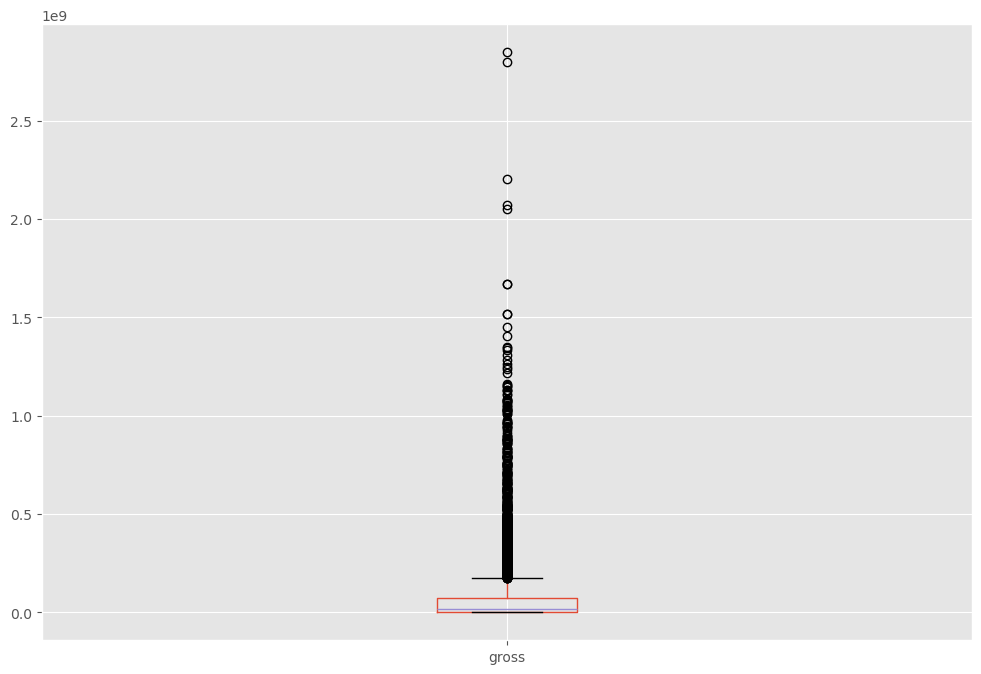

In [368]:
# Are there any Outliers?

df.boxplot(column=['gross'])
plt.show()

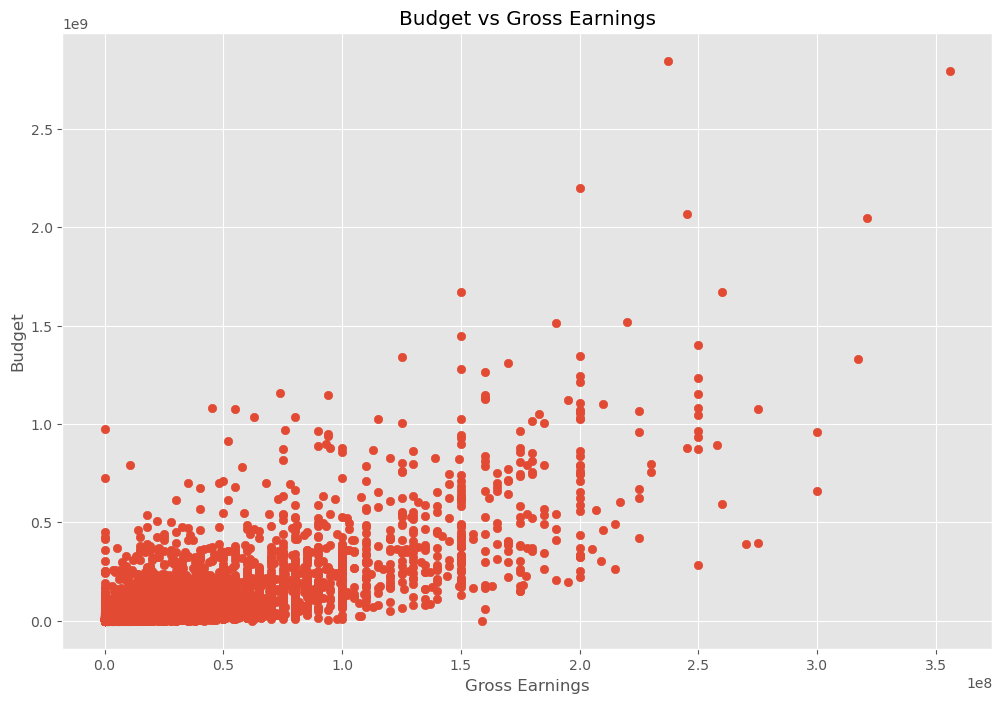

In [369]:
# Hypotheses:
# Budget is highly correlated with Gross Earnings

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

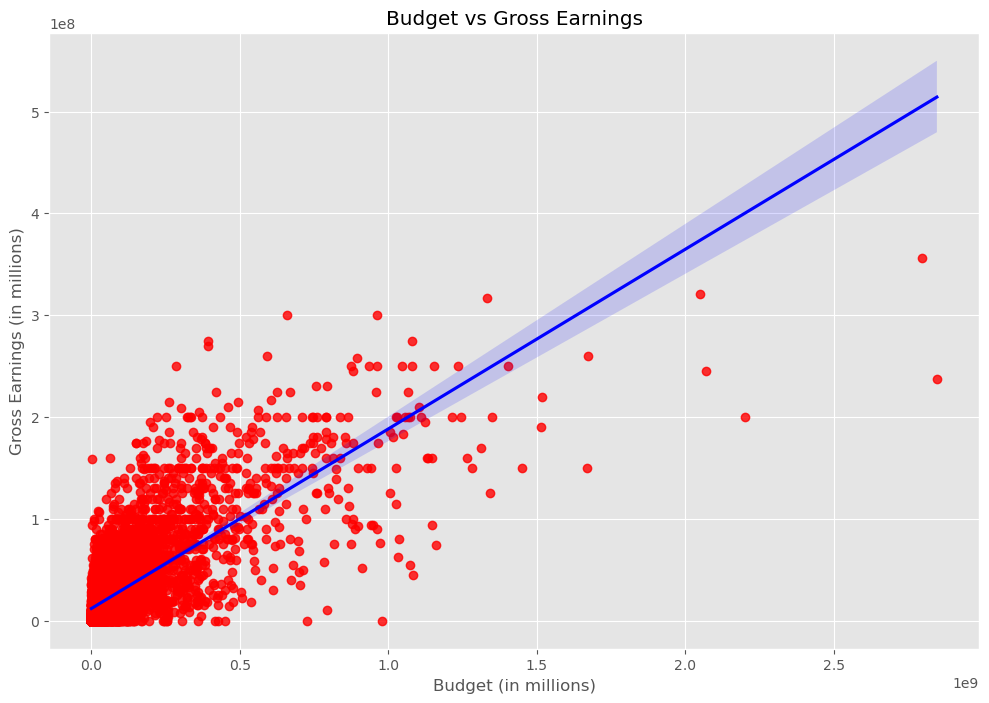

In [370]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget (in millions)")
plt.ylabel("Gross Earnings (in millions)")
plt.show()

In [374]:
df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']].corr(method='pearson')
# Shows a high correlation between Budget and Gross

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.268372,0.056863,0.486931,0.309212
gross,0.750157,1.000000,0.244339,0.186012,0.632870,0.261900
runtime,0.268372,0.244339,1.000000,0.394564,0.306984,0.116358
score,0.056863,0.186012,0.394564,1.000000,0.407101,0.092616
votes,0.486931,0.632870,0.306984,0.407101,1.000000,0.222427
year,0.309212,0.261900,0.116358,0.092616,0.222427,1.000000


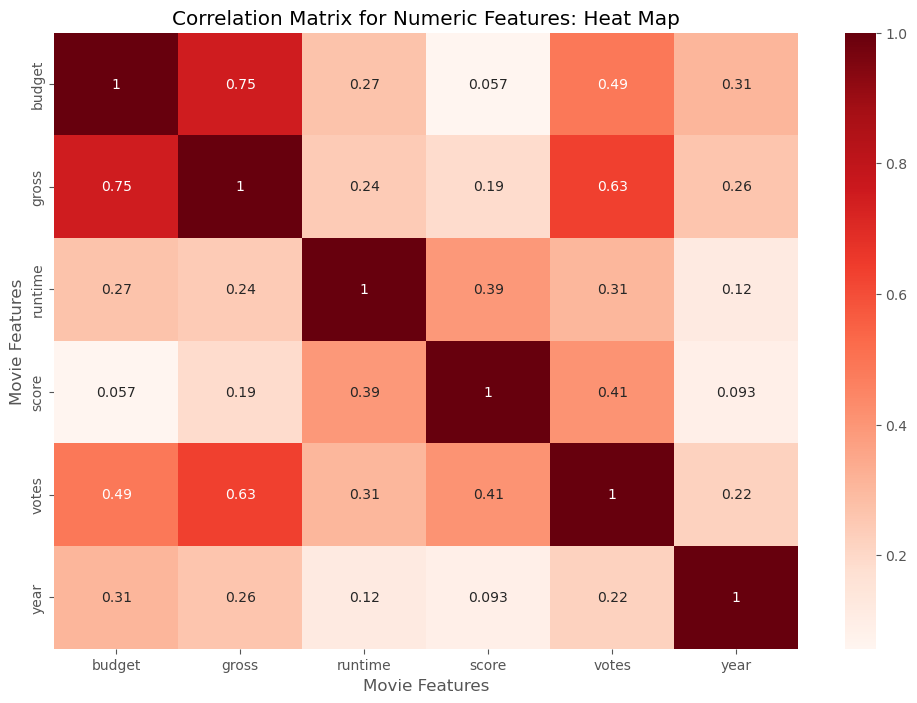

In [375]:
correlation_matrix = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']].corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True, cmap="Reds")
plt.title("Correlation Matrix for Numeric Features: Heat Map")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [376]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [414]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

high_corr = sorted_pairs[((sorted_pairs > 0.5) | (sorted_pairs < -0.5)) & (sorted_pairs != 1)]
high_corr = high_corr.sort_values(ascending=False)
print(high_corr)

gross   votes     0.752550
votes   gross     0.752550
budget  gross     0.716816
gross   budget    0.716816
votes   budget    0.604693
budget  votes     0.604693
dtype: float64


In [416]:
high_corr = sorted_pairs[((sorted_pairs > 0.5) | (sorted_pairs < -0.5)) & (sorted_pairs != 1)]
high_corr = high_corr.sort_values(ascending=False)
print(high_corr)

gross   votes     0.752550
votes   gross     0.752550
budget  gross     0.716816
gross   budget    0.716816
votes   budget    0.604693
budget  votes     0.604693
dtype: float64


In [382]:
#Votes and Budget have the highest correlation to gross earnings